<a href="https://colab.research.google.com/github/mubasshar009/ML_DL_Model/blob/master/IMBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMBD Classifying movie reviews: a binary classification example

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Listing 3.2 Encoding the integer sequences into a binary matrix

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 3.4.3 Building your network

In [9]:
from keras import models
from keras import layers

In [12]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Listing 3.4 Compiling the model

In [13]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# Listing 3.5 Configuring the optimizer

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# Listing 3.6 Using custom losses and metrics

In [15]:
from keras import losses 
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

# 3.4.4 Validating your approach

### Listing 3.7 Setting aside a validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Listing 3.8 Training your model

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4845 - acc: 0.8008 - val_loss: 0.3824 - val_acc: 0.8573
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2902 - acc: 0.9049 - val_loss: 0.2969 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2147 - acc: 0.9303 - val_loss: 0.3673 - val_acc: 0.8451
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1687 - acc: 0.9478 - val_loss: 0.2765 - val_acc: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1418 - acc: 0.9539 - val_loss: 0.2867 - val_acc: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1142 - acc: 0.9643 - val_loss: 0.3088 - val_acc: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0962 - acc: 0.9718 - val_loss: 0.3191 - val_acc: 0.8811
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0810 - a

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Listing 3.9 Plotting the training and validation loss

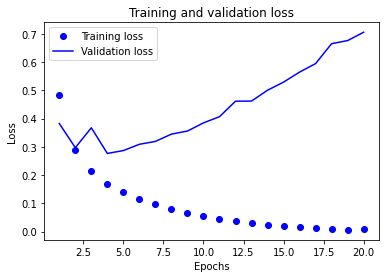

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

# Listing 3.10 Plotting the training and validation accuracy

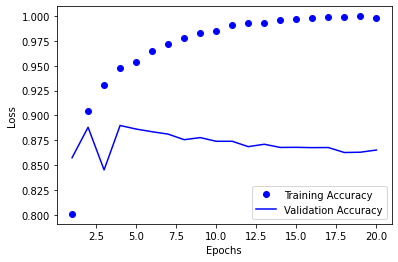

In [20]:
plt.clf()
train_acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,train_acc_values,'bo',label = 'Training Accuracy')
plt.plot(epochs, val_acc_values,'b',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Listing 3.11 Retraining a model from scratch

In [21]:
model = models.Sequential()
model.add(layers.Dense(32,activation='tanh',input_shape = (10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer = 'rmsprop',loss='mse',metrics =['accuracy'])

In [23]:
model.fit(x_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
49/49 [==============================] - 1s 12ms/step - loss: 0.1316 - accuracy: 0.8307
Epoch 2/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0663 - accuracy: 0.9142
Epoch 3/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0501 - accuracy: 0.9360
Epoch 4/10
49/49 [==============================] - 1s 12ms/step - loss: 0.0424 - accuracy: 0.9463
Epoch 5/10
49/49 [==============================] - 1s 12ms/step - loss: 0.0362 - accuracy: 0.9563
Epoch 6/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0309 - accuracy: 0.9620
Epoch 7/10
49/49 [==============================] - 1s 12ms/step - loss: 0.0283 - accuracy: 0.9658
Epoch 8/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0262 - accuracy: 0.9696
Epoch 9/10
49/49 [==============================] - 1s 13ms/step - loss: 0.0220 - accuracy: 0.9748
Epoch 10/10
49/49 [==============================] - 1s 12ms/step - loss: 0.0212 - accuracy: 0.9756


In [24]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.1241 - accuracy: 0.8567


[0.12412010878324509, 0.8566799759864807]

# 3.4.5 Using a trained network to generate predictions on new data

In [25]:
  model.predict(x_test)

array([[0.02169456],
       [0.99976283],
       [0.9935913 ],
       ...,
       [0.37569377],
       [0.01053486],
       [0.86122096]], dtype=float32)